## 텍스트 마이닝
* 자연어로 구성된 `비정형데이터`에서 패턴, 관계를 추출하여
* `의미 있는 정보`를 찾아내는 기법들을 의미
* 트위터, 페이스북, 블로그, 웹 게시판,
* 온라인 뉴스등 웹상에 존재하는 방대한 비정형 데이터들을 실시간으로 수집/분석하여
* 고객의 감성 및 의도등을 알아내는 과정을 의미
* 자연어 처리(Natural Lanaguage Processing)와  텍스트 분석(text analytics) 등이 핵심 분야

### 텍스트마이닝의 활용분야
* 텍스트분류 : 문서가 특정 분류/카테고리에 속하는 것을 예측
* 감성분석 : 텍스트에 나타나는 감정/판단/믿음/의견등의 주관적인 요소를 분석
* 텍스트요약 : 텍스트 내에서 중요한 주제나 중심사상을 추출
* 텍스트군집화 : 비슷한 유형의 문서에 대해 군집화 수행

### 텍스트 분석 수행 과정
* **텍스트 사전준비/전처리** : 대소문자변경, 문장/숫자/특수문자 삭제, 토큰화, 불용어 제거, 어근 추출
* **특성 벡터화/추출** : 가공된 텍스트에서 특성 추출후 여기에 벡터값을 지정, (BOW, Word2Vec등을 사용)
* **머신러닝 모델 학습/예측/평가** : 감성분석/연관성분석

### 파이썬 기반 텍스트 분석 패키지
* NLTK, KoNLPy : 영어권/한국어 형태소 분석기
* Gensim : 텍스트요약(토픽모델링)에 두각을 나타냄, word2vec 기능도 구현되어 있음
* SpaCy : 최근 주목받는 NLP 패키지

### NLTK
* 교육용으로 개발된 자연어 처리 및 분석용 파이썬 패키지
* 다양한 예제를 포함하고 있음
* www.nltk.org
* 설치 : pip install nltk

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [3]:
# nltk 말뭉치 다운로드
nltk.download('book', quiet=True)

True

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# 다양한 글모음
nltk.book.texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# 다양한 문장모음
nltk.book.sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [7]:
# 저작권이 말소된 문학작품 목록
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
# 햄릿의 일부 텍스트 출력
docs = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
docs[:350]

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get th"

### 텍스트 전처리 : 토큰화tokenize
* 문장토큰화 : 문서에서 문장을 분리
* 단어토큰화 : 문장에서 단어를 분리

In [9]:
from nltk import sent_tokenize, word_tokenize

In [10]:
# 토큰화 관련 라이브러리 다운로드
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
text_sample = \
    'The Matrix is everywhere its all around us, \
    here even in this room. You can see it out your \
    window or on your television.'

In [12]:
# 문장 토큰화 : sent_tokenize
sents = sent_tokenize(text_sample)
sents  # 토큰화 결과는 리스트

['The Matrix is everywhere its all around us,     here even in this room.',
 'You can see it out your     window or on your television.']

In [13]:
# 단어 토큰화 : word_tokenize
words = word_tokenize(text_sample)
words  # 토큰화 결과는 리스트

['The',
 'Matrix',
 'is',
 'everywhere',
 'its',
 'all',
 'around',
 'us',
 ',',
 'here',
 'even',
 'in',
 'this',
 'room',
 '.',
 'You',
 'can',
 'see',
 'it',
 'out',
 'your',
 'window',
 'or',
 'on',
 'your',
 'television',
 '.']

#### 트럼프 연설문에 대한 단어 토큰화

In [14]:
with open('./data/trump_en.txt') as f:
    docs = f.read()

In [15]:
docs[:200]

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of t'

In [16]:
tru_sents = sent_tokenize(docs)
tru_sents[0]

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of the people of the United States of America.'

In [17]:
tru_words = word_tokenize(tru_sents[0])
tru_words[3]

','

### 불용어stopword 제거
* 분석상 큰 의미가 없는 단어를 지칭
* NLTK상에서는 stopwords 형태로 제공됨
* 기본적으로 단어수는 적음

In [18]:
# 불용어 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# 불용어 확인
nltk.corpus.stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### 불용어를 이용해서 단어 토큰화

In [20]:
words = []
sents = sent_tokenize(text_sample)
for sent in sents:
    words.append(word_tokenize(sent)) # 개별 문장에 대한 단어토큰화
words

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.'],
 ['You',
  'can',
  'see',
  'it',
  'out',
  'your',
  'window',
  'or',
  'on',
  'your',
  'television',
  '.']]

In [21]:
stopwords = nltk.corpus.stopwords.words('english')
tokens = []

for wds in words:
    filter_words = []
    for w in wds:
        w = w.lower()  # 소문자 변환
        if w not in stopwords:  # 단어가 불용어에 속해있지 않다면
            filter_words.append(w)
    tokens.append(filter_words)

tokens

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'],
 ['see', 'window', 'television', '.']]

#### 트럼프 연설문에 대한 불용어를 이용한 단어 토큰화

In [22]:
with open('./data/trump_en.txt') as f:
    docs = f.read()

In [23]:
# 문장 추출시 숫자와 문장부호는 제외
import re

sents = sent_tokenize(docs)

twords = []
for sent in sents:
    # 알파벳 대소문자를 제외하고 모두 제거
    clean = re.sub('[^a-zA-Z]', ' ', sent)
    
    s = word_tokenize(clean)
    twords.append(s)
    
twords[:1]

[['Assembly',
  'Speaker',
  'Chung',
  'distinguished',
  'members',
  'of',
  'this',
  'Assembly',
  'ladies',
  'and',
  'gentlemen',
  'Thank',
  'you',
  'for',
  'the',
  'extraordinary',
  'privilege',
  'to',
  'speak',
  'in',
  'this',
  'great',
  'chamber',
  'and',
  'to',
  'address',
  'your',
  'people',
  'on',
  'behalf',
  'of',
  'the',
  'people',
  'of',
  'the',
  'United',
  'States',
  'of',
  'America']]

In [58]:
ttokens = []

for wds in twords:
    filter_words = []
    for w in wds:
        w = w.lower()  # 소문자 변환
        if w not in stopwords:  # 단어가 불용어에 속해있지 않다면
            filter_words.append(w)
    ttokens.append(filter_words)

ttokens

[['assembly',
  'speaker',
  'chung',
  'distinguished',
  'members',
  'assembly',
  'ladies',
  'gentlemen',
  'thank',
  'extraordinary',
  'privilege',
  'speak',
  'great',
  'chamber',
  'address',
  'people',
  'behalf',
  'people',
  'united',
  'states',
  'america'],
 ['short',
  'time',
  'country',
  'melania',
  'awed',
  'ancient',
  'modern',
  'wonders',
  'deeply',
  'moved',
  'warmth',
  'welcome'],
 ['last', 'night', 'president', 'mrs'],
 ['moon',
  'showed',
  'us',
  'incredible',
  'hospitality',
  'beautiful',
  'reception',
  'blue',
  'house'],
 ['productive',
  'discussions',
  'increasing',
  'military',
  'cooperation',
  'improving',
  'trade',
  'relationship',
  'nations',
  'principle',
  'fairness',
  'reciprocity'],
 ['entire',
  'visit',
  'pleasure',
  'honor',
  'create',
  'celebrate',
  'long',
  'friendship',
  'united',
  'states',
  'republic',
  'korea'],
 ['alliance',
  'nations',
  'forged',
  'crucible',
  'war',
  'strengthened',
  'trial

#### 스티브잡스 연설문에 대한 불용어를 이용한 단어 토큰화

In [25]:
with open('./data/stevejobs_en.txt') as f:
    ste = f.read()
ste[:100]

'I am honored to be with you today at your commencement from one of the finest universities in the wo'

In [26]:
# 문장 추출시 숫자와 문장부호는 제외
sents = sent_tokenize(ste)

jwords = []
for sent in sents:
    # 알파벳 대소문자를 제외하고 모두 제거
    s = re.sub('[^a-zA-Z]', ' ', sent).strip()
    jwords.append(word_tokenize(s))
    
jwords[0]

['I',
 'am',
 'honored',
 'to',
 'be',
 'with',
 'you',
 'today',
 'at',
 'your',
 'commencement',
 'from',
 'one',
 'of',
 'the',
 'finest',
 'universities',
 'in',
 'the',
 'world']

In [72]:
jokens = []

for wds in jwords:
    filter_words = []
    for w in wds:
        w = w.lower()  # 소문자 변환
        if w not in stopwords:  # 단어가 불용어에 속해있지 않다면
            filter_words.append(w)
    jokens.append(filter_words)

jokens

[['honored',
  'today',
  'commencement',
  'one',
  'finest',
  'universities',
  'world'],
 ['never', 'graduated', 'college'],
 ['truth', 'told', 'closest', 'ever', 'gotten', 'college', 'graduation'],
 ['today', 'want', 'tell', 'three', 'stories', 'life'],
 [],
 ['big', 'deal'],
 ['three', 'stories'],
 ['dropped',
  'reed',
  'college',
  'first',
  'months',
  'stayed',
  'around',
  'drop',
  'another',
  'months',
  'really',
  'quit'],
 ['drop'],
 ['started', 'born'],
 ['biological',
  'mother',
  'young',
  'unwed',
  'college',
  'graduate',
  'student',
  'decided',
  'put',
  'adoption'],
 ['felt',
  'strongly',
  'adopted',
  'college',
  'graduates',
  'everything',
  'set',
  'adopted',
  'birth',
  'lawyer',
  'wife'],
 ['except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl'],
 ['parents',
  'waiting',
  'list',
  'got',
  'call',
  'middle',
  'night',
  'asking',
  'unexpected',
  'baby',
  'boy',
  'want',
  'said',
  'course',
  'biological',
  'm

### 형태소 태깅(part-of-speech tagging)
* part-of-speech(POS) tagging
* 문장 내 단어들을 품사별로 식별하여 분류하고 그에 따라 태그를 붙이는 과정
* 즉, 품사를 사용해 주어진 문장의 단어를 분리하는 것
* NLTK는 Penn Treebank Tagset 이용
    + 명사 : N으로 시작 (NN-일반명사, NNP-고유명사)
    + 형용사 : J로 시작(JJ, JJR-비교급, JJS-최상급)
    + 동사: V로 시작 (VB-동사, VBP-현재형 동사)
    + 부사: R로 시작 (RB-부사)
    + nltk.help.upenn_tagset('키워드') : 도움말
* pos_tag(단어_리스트):단어와 품사를 튜플로 묶은 리스트를 반환

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
from nltk.tag import pos_tag

In [30]:
tokens = [['matrix', 'everywhere', 'around', 'us', 'even', 'room'],
             ['see', 'window', 'television'],
             ['feel', 'go', 'work', 'go', 'church', 'ay', 'taxes']]

In [31]:
# IN : 전치사(종속접속사)
# PRP : 인칭대명사
pos_tag(tokens[0])

[('matrix', 'NN'),
 ('everywhere', 'RB'),
 ('around', 'IN'),
 ('us', 'PRP'),
 ('even', 'RB'),
 ('room', 'NN')]

In [32]:
pos_tag(tokens[1])

[('see', 'VB'), ('window', 'JJ'), ('television', 'NN')]

In [33]:
pos_tag(tokens[2])

[('feel', 'NN'),
 ('go', 'VB'),
 ('work', 'NN'),
 ('go', 'VBP'),
 ('church', 'NN'),
 ('ay', 'NN'),
 ('taxes', 'NNS')]

### 품사 태깅 후 명사 추출

In [59]:
nouns = []
for t in tokens:
    tags = pos_tag(t)
    # for tag in tags:
    #     print(tag[0], tag[1]) / 이걸 리스트로 밑 코드로 담아낼 수 있음
    # 품사가 명사 NN인 토큰만 추출해서 리스트에 저장
    NN = [tag[0] for tag in tags if tag[1] == 'NN']
    nouns.append(NN)
nouns

[['matrix', 'room'], ['television'], ['feel', 'work', 'church', 'ay']]

#### 트럼프 연설문에서 추출된 토큰에 대해 품사태깅후 명사 추출

In [60]:
tnouns = []
for t in ttokens:
    tags = pos_tag(t)
    NN = [tag[0] for tag in tags if tag[1] == 'NN']
    tnouns.append(NN)
tnouns[:5]

[['speaker', 'chung', 'privilege', 'speak', 'chamber'],
 ['time', 'country', 'melania', 'welcome'],
 ['night', 'president', 'mrs'],
 ['moon', 'hospitality', 'reception', 'blue', 'house'],
 ['cooperation',
  'trade',
  'relationship',
  'principle',
  'fairness',
  'reciprocity']]

#### 스티브잡스 연설문에 추출된 토큰에 대해 품사태깅후 명사 추출

In [73]:
jnouns = []
for t in jokens:
    tags = pos_tag(t)
    # for tag in tags:
    #     print(tag[0], tag[1]) / 이걸 리스트로 밑 코드로 담아낼 수 있음
    # 품사가 명사 NN인 토큰만 추출해서 리스트에 저장
    NN = [tag[0] for tag in tags if tag[1] == 'NN']
    jnouns.append(NN)
jnouns[:5]

[['today', 'commencement', 'finest', 'world'],
 ['college'],
 ['truth', 'college', 'graduation'],
 ['today', 'tell', 'life'],
 []]

### 단어별 빈도 계산
* FreqDist

In [37]:
# 추출한 명사들을 하나의 리스트로 재저장
NNS = []
for ns in nouns:
    for n in ns:
        NNS.append(n)
NNS

['matrix', 'room', 'television', 'feel', 'work', 'church', 'ay']

In [38]:
FreqDist(NNS)

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'church': 1, 'ay': 1})

In [39]:
frqwd = FreqDist(NNS)
frqwd

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'church': 1, 'ay': 1})

In [40]:
# 빈도 계산에 사용된 단어 수
frqwd.N()

7

In [41]:
# 특정단어 빈도 출력
frqwd['room']

1

In [42]:
# 빈도가 많은 순으로 출력
frqwd.most_common()

[('matrix', 1),
 ('room', 1),
 ('television', 1),
 ('feel', 1),
 ('work', 1),
 ('church', 1),
 ('ay', 1)]

In [43]:
# 빈도순으로 상위 n개의 단어 출력
frqwd.most_common(3)

[('matrix', 1), ('room', 1), ('television', 1)]

### 트럼프 연설문 중 빈도별 단어 출력

In [62]:
TNNS = []
for ns in tnouns:
    for n in ns:
        TNNS.append(n)
TNNS

['speaker',
 'chung',
 'privilege',
 'speak',
 'chamber',
 'time',
 'country',
 'melania',
 'welcome',
 'night',
 'president',
 'mrs',
 'moon',
 'hospitality',
 'reception',
 'blue',
 'house',
 'cooperation',
 'trade',
 'relationship',
 'principle',
 'fairness',
 'reciprocity',
 'visit',
 'pleasure',
 'honor',
 'create',
 'celebrate',
 'friendship',
 'alliance',
 'war',
 'history',
 'inchon',
 'pork',
 'chop',
 'spring',
 'city',
 'today',
 'time',
 'year',
 'capital',
 'way',
 'form',
 'line',
 'today',
 'line',
 'time',
 'armistice',
 'war',
 'price',
 'country',
 'freedom',
 'war',
 'city',
 'seoul',
 'country',
 'war',
 'economy',
 'nation',
 'world',
 'something',
 'half',
 'peninsula',
 'family',
 'family',
 'city',
 'city',
 'country',
 'today',
 'world',
 'congratulate',
 'lifetime',
 'south',
 'korea',
 'devastation',
 'earth',
 'today',
 'economy',
 'trade',
 'life',
 'expectancy',
 'today',
 'election',
 'year',
 'today',
 'celebrate',
 'something',
 'miracle',
 'stock',
 'm

In [63]:
FreqDist(TNNS)

FreqDist({'regime': 15, 'world': 13, 'korea': 11, 'today': 10, 'nation': 9, 'time': 8, 'country': 8, 'war': 8, 'peninsula': 8, 'year': 7, ...})

In [64]:
t_frqwd = FreqDist(TNNS)
t_frqwd

FreqDist({'regime': 15, 'world': 13, 'korea': 11, 'today': 10, 'nation': 9, 'time': 8, 'country': 8, 'war': 8, 'peninsula': 8, 'year': 7, ...})

In [65]:
# 빈도 계산에 사용된 단어 수
t_frqwd.N()

586

In [66]:
# 특정단어 빈도 출력
t_frqwd['world']

13

In [67]:
# 빈도가 많은 순으로 출력
t_frqwd.most_common(10)

[('regime', 15),
 ('world', 13),
 ('korea', 11),
 ('today', 10),
 ('nation', 9),
 ('time', 8),
 ('country', 8),
 ('war', 8),
 ('peninsula', 8),
 ('year', 7)]

In [68]:
# 빈도순으로 상위 n개의 단어 출력
t_frqwd.most_common(3)

[('regime', 15), ('world', 13), ('korea', 11)]

### 스티브잡스 연설문 중 빈도별 단어 출력

In [74]:
JNNS = []
for ns in jnouns:
    for n in ns:
        JNNS.append(n)
JNNS[:10]

['today',
 'commencement',
 'finest',
 'world',
 'college',
 'truth',
 'college',
 'graduation',
 'today',
 'tell']

In [75]:
FreqDist(JNNS)

FreqDist({'life': 17, 'college': 14, 'apple': 9, 'everything': 6, 'death': 6, 'way': 5, 'something': 5, 'company': 5, 'today': 4, 'course': 4, ...})

In [76]:
j_frqwd = FreqDist(JNNS)
j_frqwd

FreqDist({'life': 17, 'college': 14, 'apple': 9, 'everything': 6, 'death': 6, 'way': 5, 'something': 5, 'company': 5, 'today': 4, 'course': 4, ...})

In [77]:
# 빈도 계산에 사용된 단어 수
j_frqwd.N()

318

In [78]:
# 특정단어 빈도 출력
j_frqwd['life']

17

In [79]:
# 빈도가 많은 순으로 출력
j_frqwd.most_common(15)

[('life', 17),
 ('college', 14),
 ('apple', 9),
 ('everything', 6),
 ('death', 6),
 ('way', 5),
 ('something', 5),
 ('company', 5),
 ('today', 4),
 ('course', 4),
 ('computer', 4),
 ('heart', 4),
 ('work', 4),
 ('stay', 4),
 ('world', 3)]

In [80]:
# 빈도순으로 상위 n개의 단어 출력
j_frqwd.most_common(3)

[('life', 17), ('college', 14), ('apple', 9)]

### 단어별 빈도 시각화
* wordcloud (https://github.com/amueller/word_cloud)

In [61]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/22/8c/18556cbe48b6d2e03d6bb1001ef79b9255c767d2927addcf090b700a1de9/wordcloud-1.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.1/473.1 kB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [84]:
wc = dict(frqwd.most_common())
wc

{'matrix': 1,
 'room': 1,
 'television': 1,
 'feel': 1,
 'work': 1,
 'church': 1,
 'ay': 1}

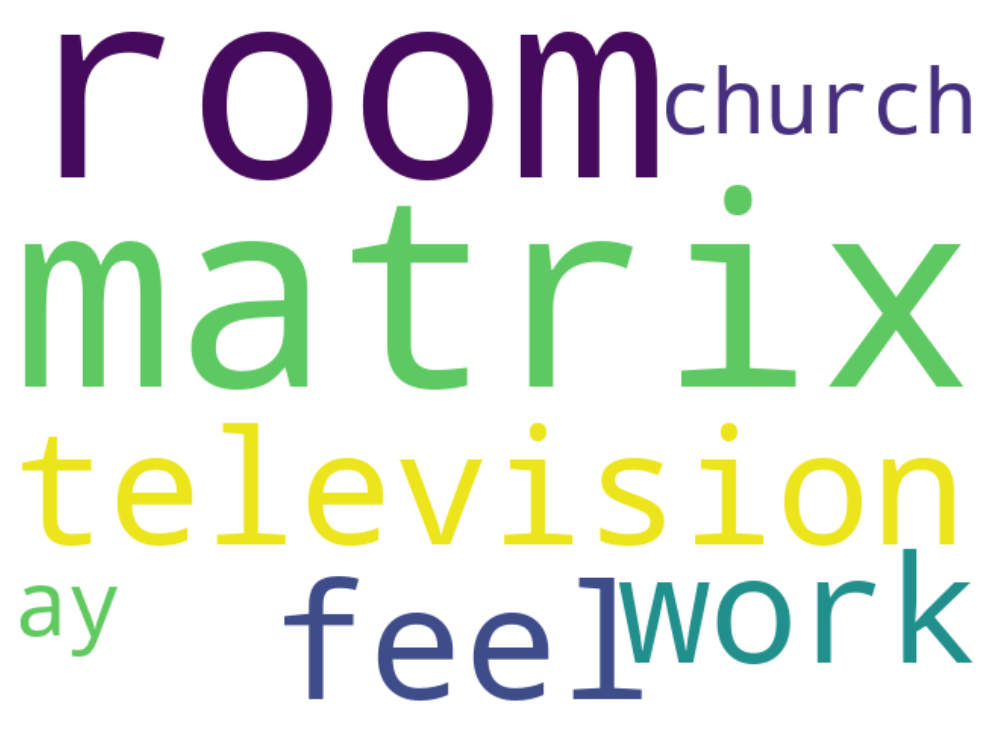

In [87]:
wcimg = WordCloud(background_color='white',
        width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 트럼프 연설문 워드클라우드

In [88]:
twc = dict(t_frqwd.most_common())
twc

{'regime': 15,
 'world': 13,
 'korea': 11,
 'today': 10,
 'nation': 9,
 'time': 8,
 'country': 8,
 'war': 8,
 'peninsula': 8,
 'year': 7,
 'peace': 7,
 'city': 6,
 'line': 6,
 'life': 6,
 'day': 6,
 'history': 5,
 'something': 5,
 'dream': 5,
 'way': 4,
 'freedom': 4,
 'economy': 4,
 'strength': 4,
 'work': 4,
 'future': 4,
 'destiny': 4,
 'form': 3,
 'half': 3,
 'family': 3,
 'miracle': 3,
 'republic': 3,
 'wealth': 3,
 'spirit': 3,
 'state': 3,
 'labor': 3,
 'kim': 3,
 'crime': 3,
 'death': 3,
 'person': 3,
 'dictatorship': 3,
 'glory': 3,
 'hope': 3,
 'danger': 3,
 'path': 3,
 'god': 3,
 'thank': 3,
 'president': 2,
 'house': 2,
 'trade': 2,
 'celebrate': 2,
 'capital': 2,
 'armistice': 2,
 'seoul': 2,
 'devastation': 2,
 'earth': 2,
 'justice': 2,
 'f': 2,
 'administration': 2,
 'crisis': 2,
 'luck': 2,
 'promise': 2,
 'money': 2,
 'technology': 2,
 'terrorism': 2,
 'magnificent': 2,
 'stop': 2,
 'loyalty': 2,
 'score': 2,
 'tyrant': 2,
 'torture': 2,
 'help': 2,
 'north': 2,
 'con

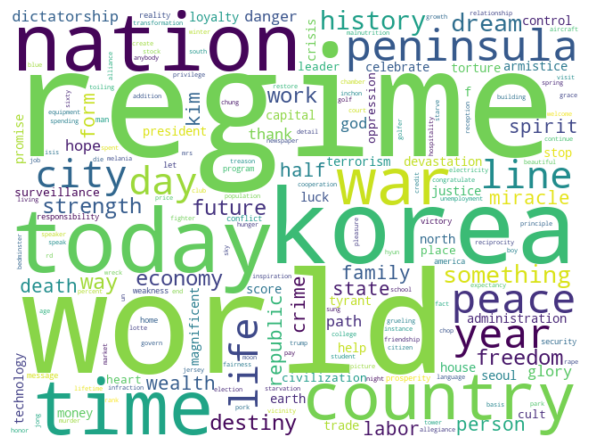

In [95]:
twcimg = WordCloud(background_color='white',
        width=640, height=480).generate_from_frequencies(twc)
plt.figure(figsize=(6,6))
plt.imshow(twcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 스티브잡스 연설문 워드클라우드

In [93]:
jwc = dict(j_frqwd.most_common())
jwc

{'life': 17,
 'college': 14,
 'apple': 9,
 'everything': 6,
 'death': 6,
 'way': 5,
 'something': 5,
 'company': 5,
 'today': 4,
 'course': 4,
 'computer': 4,
 'heart': 4,
 'work': 4,
 'stay': 4,
 'world': 3,
 'drop': 3,
 'wife': 3,
 'class': 3,
 'trust': 3,
 'time': 3,
 'typography': 3,
 'story': 3,
 'year': 3,
 'get': 3,
 'day': 3,
 'morning': 3,
 'cancer': 3,
 'mother': 2,
 'graduate': 2,
 'adoption': 2,
 'minute': 2,
 'night': 2,
 'idea': 2,
 'help': 2,
 'intuition': 2,
 'country': 2,
 'calligraphy': 2,
 'none': 2,
 'mac': 2,
 'love': 2,
 'someone': 2,
 'generation': 2,
 'failure': 2,
 'turn': 2,
 'thing': 2,
 'family': 2,
 'tumor': 2,
 'doctor': 2,
 'die': 2,
 'form': 2,
 'surgery': 2,
 'earth': 2,
 'catalog': 2,
 'issue': 2,
 'commencement': 1,
 'finest': 1,
 'truth': 1,
 'graduation': 1,
 'tell': 1,
 'deal': 1,
 'student': 1,
 'lawyer': 1,
 'girl': 1,
 'list': 1,
 'baby': 1,
 'boy': 1,
 'father': 1,
 'school': 1,
 'stanford': 1,
 'tuition': 1,
 'value': 1,
 'figure': 1,
 'money'

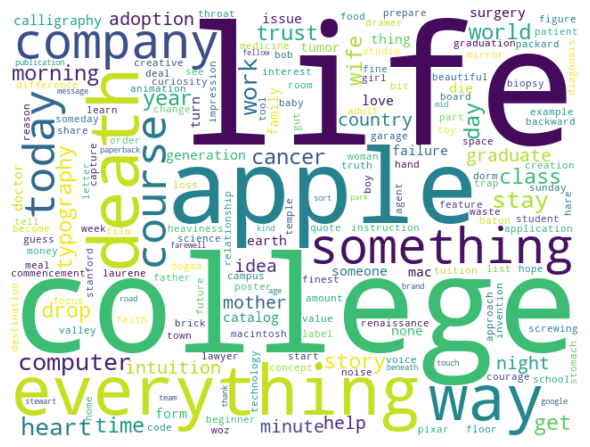

In [94]:
jwcimg = WordCloud(background_color='white',
        width=640, height=480).generate_from_frequencies(jwc)
plt.figure(figsize=(6,6))
plt.imshow(jwcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 마스크를 이용한 워드클라우드

In [96]:
pip install image

  Preparing metadata (setup.py) ... done
  Obtaining dependency information for django from https://files.pythonhosted.org/packages/bf/8b/c38f2354b6093d9ba310a14b43a830fdf776edd60c2e25c7c5f4d23cc243/Django-4.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for asgiref<4,>=3.6.0 from https://files.pythonhosted.org/packages/9b/80/b9051a4a07ad231558fcd8ffc89232711b4e618c15cb7a392a17384bbeef/asgiref-3.7.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.0 MB/s eta 0:00:0000:0100:01
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=dfe46bab05e305aa40cbffdc94289a926e66e8ee5b9738e1dedaf87c62af27c9
  Stored in directory: /home/jovyan/.cache/pip/wheels/62/40/4f/3c9a8d0f22a1a6f966975a460e5cb509a1e7dc42e2ce5d9a6d
Successfully built image
Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
from PIL import Image

In [99]:
# 마스크 이미지 지정
mask_path = './img/h.jpg'
mask = np.array(Image.open(mask_path))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

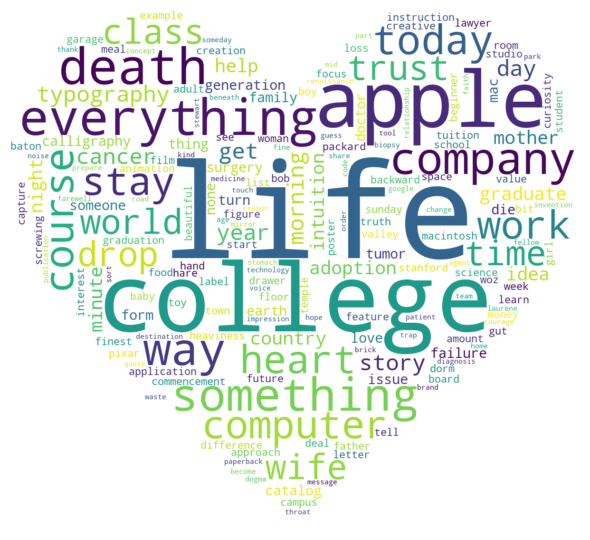

In [101]:
# 마스크로 워드클라우드 출력
jwcimg = WordCloud(background_color='white', mask=mask,
        width=640, height=480).generate_from_frequencies(jwc)
plt.figure(figsize=(6,6))
plt.imshow(jwcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

In [104]:
mask_path = './img/m.jpg'
mask = np.array(Image.open(mask_path))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

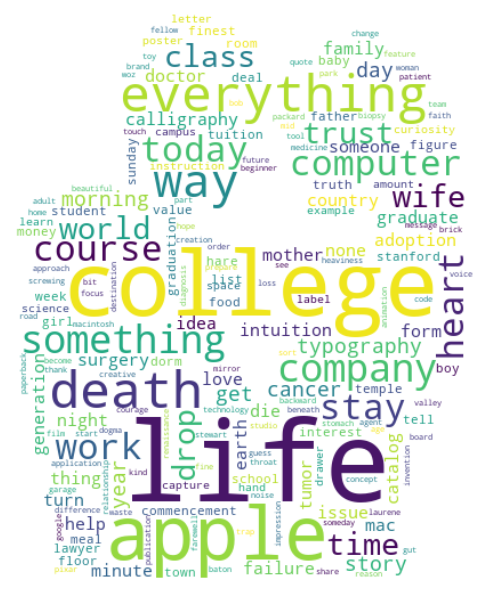

In [105]:
jwcimg = WordCloud(background_color='white', mask=mask,
        width=640, height=480).generate_from_frequencies(jwc)
plt.figure(figsize=(6,6))
plt.imshow(jwcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()